***1. Business Understanding***


The objective of this project is to predict future sales of products in a retail chain. Accurate sales forecasts help with better inventory management, cost reduction, and strategic planning.

A large Indian retail chain has stores across 3 states in India: Maharashtra, Telangana and Kerala.

These stores stock products across various categories such as FMCG (fast moving consumer goods), eatables / perishables and others.

***columns: ***

train_data ->date,product_identifier,department_identifier,category_of_product,outlet,state,sales

test_data-> id,date,product_identifier,department_identifier,category_of_product,outlet,state

product_prices->outlet,product_identifier,week_id,sell_price

date_to_week_id_map->date,week_id

● date : The date for which the observation was recorded

● product_identifier : The id for a product

● department_identifier : The id for a specific department in a store

● category_of_product : The category to which a product belongs

● outlet : The id for a store

● state : The name of the state

● sales : The number of sales for the product

● week_id : A unique identifier for a specific week

● sell_price : The price at which a product was sold in a specific outlet during a specific week

***2. Data Understanding***

The datasets were merged into a single dataframe using common keys such as date, product_identifier, week_id and outlet.

Exploratory Data Analysis (EDA) steps were performed including datatype conversion, feature extraction from dates

correlation analysis to understand relationships between variables.


***3. Data Preparation***

The date feature was converted to a datetime format and from it, the month was extracted, replacing the original date column.

Merged all relevant datasets to create a complete training set.

Features were cast into appropriate data types (e.g., categorical and numerical).

Irrelevant or redundant features were dropped based on correlation analysis.

The final dataset was split into independent variables (X) and the target variable (y), which was the quantity sold.

***4. Modeling***

Applied supervised learning models like Linear Regression, Decision Trees, and Random Forest etc


***5. Evaluation***

Models were evaluated and compared based on performance metrics.

Used metrics like RMSE, MAE, and R² to compare model performance. Random Forest performed best.(KNN is having less than random forest but KNN is simple and worked well, but Random Forest is more scalable, stable, and preferred in real-world use,so we use Random Forest)

In [1]:
#importing the essentional libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display
#here we are reading the all the csv files
date_week = pd.read_csv('date_to_week_id_map.csv')
prod_price = pd.read_csv('product_prices.csv')
dataset = pd.read_csv('train_data.csv')

#displaying the csv file using display() so that we will get the otputs in the same cell.
display(date_week)
display(prod_price)
display(dataset)

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49
...,...,...
816,2014-03-27,165
817,2014-03-28,165
818,2014-03-29,166
819,2014-03-30,166


,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94
...,...,...,...,...
58995,333,3021,162,2.08
58996,333,3021,163,2.08
58997,333,3021,164,2.08
58998,333,3021,165,2.08


,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0
...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0


In [3]:
date_week.shape,prod_price.shape,dataset.shape #just check the number of rows and columns in the dataset

((821, 2), (59000, 4), (395000, 7))

***Merge the files into one data frame for training data***

In [4]:
#merge csv files
# Merge product prices with week-date on week_id
#here the commo0n column in both file is weekid ,how='inner' means we need to keeps rows where week_id exists in both files
df=pd.merge(prod_price,date_week, on=['week_id'], how='inner')
df.head()


# Merge the above result with train_data
# Specify suffixes to avoid duplicate column names
dataset=pd.merge(dataset,df, on=['date','product_identifier','outlet'], how='inner', suffixes=('_data', '_df'))

# Step 4: View the merged dataset
dataset.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [5]:
#get the summary of the final dataset(merged data)
dataset.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


***Converted the date attribute to date and month***

In [6]:
import datetime as dt
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['month']=dataset['date'].dt.month

#Drop the date attribute
dataset=dataset.drop(['date'],axis=1)


In [7]:
#checking for missing values
dataset.isnull().sum()

,0
product_identifier,0
department_identifier,0
category_of_product,0
outlet,0
state,0
sales,0
week_id,0
sell_price,0
month,0


**there is no missing values in the dataset**

In [8]:
#checking for data types of each column.
dataset.dtypes

,0
product_identifier,int64
department_identifier,int64
category_of_product,object
outlet,int64
state,object
sales,int64
week_id,int64
sell_price,float64
month,int32


In [9]:
col = ['category_of_product', 'state']
# Convert each column to category type and then access category codes
for col_name in col:
    dataset[col_name] = dataset[col_name].astype('category').cat.codes # cat.codes-> is pandas attribute used in categorical dtype to get the integer codes & to make it int
    print(dataset[col_name])

0         2
1         2
2         2
3         2
4         1
         ..
394995    0
394996    0
394997    0
394998    0
394999    0
Name: category_of_product, Length: 395000, dtype: int8
0         1
1         1
2         1
3         1
4         1
         ..
394995    0
394996    0
394997    0
394998    0
394999    0
Name: state, Length: 395000, dtype: int8


In [10]:
#checking for data types of each column.
dataset.dtypes

,0
product_identifier,int64
department_identifier,int64
category_of_product,int8
outlet,int64
state,int8
sales,int64
week_id,int64
sell_price,float64
month,int32


***Find the correlation between the attributes to check if any of them need to be discarded***

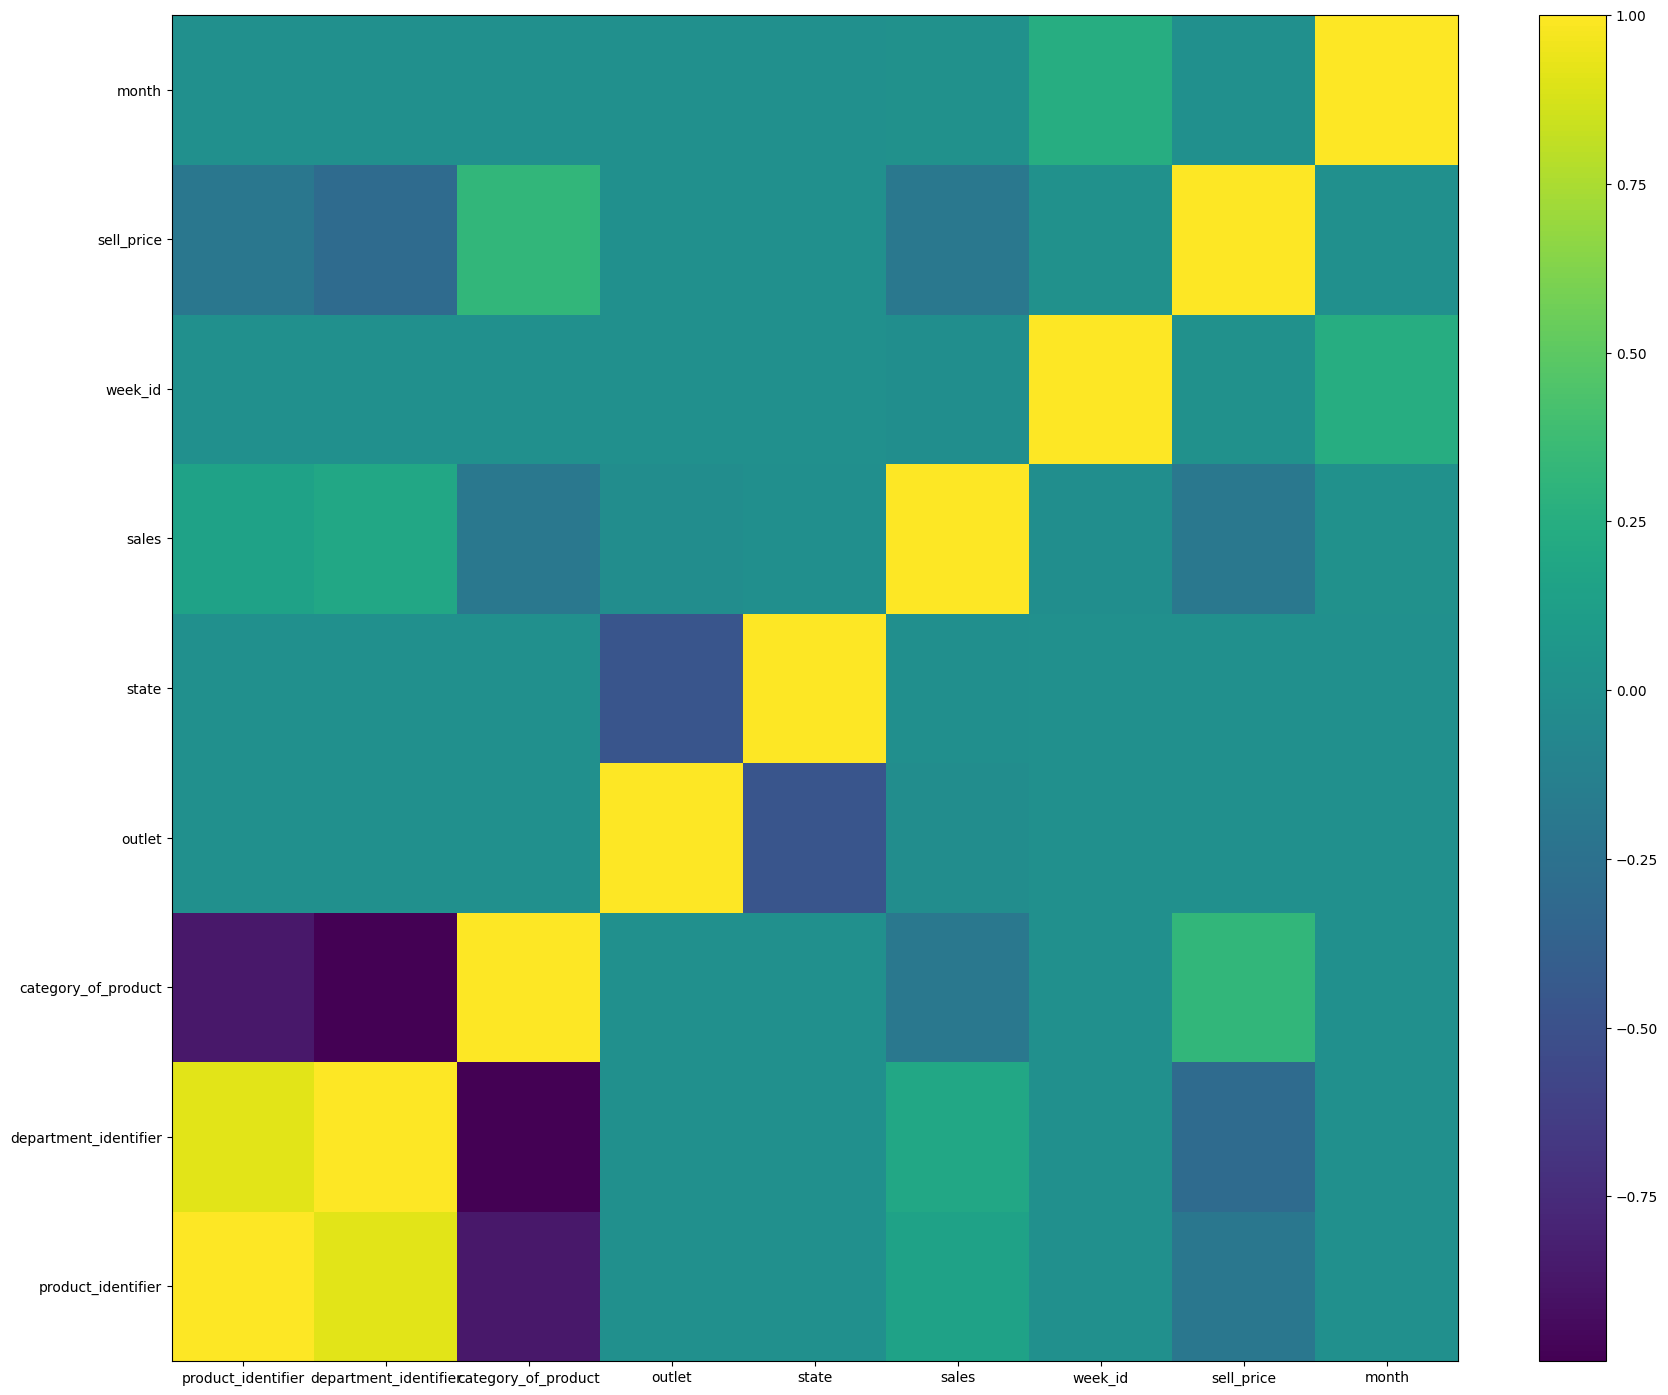

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 14))
corr = dataset.corr()
c = plt.pcolor(corr) #Creates a pseudocolor plot of the correlation matrix
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plt.tight_layout() #avoids label overlap
fig.colorbar(c)

**product_identifier and department_identifier: Very high positive correlation**

**product_identifier and cat_prod_encoded : Appears to have a negative correlation.**

**sales has weak correlation with most other variables (e.g., week_id, state, outlet, etc.)**

In [12]:
#Define the target and feature variable
X=dataset[['product_identifier','department_identifier','category_of_product','outlet','state','week_id','sell_price','month']]
Y=dataset['sales']

In [13]:
#Split the data into training and testing for the model fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

**Evaluate all the models**

In [ ]:
# models=[
#     LinearRegression(),
#     LogisticRegression(),
#     DecisionTreeRegressor(),
#     RandomForestRegressor(),
#     KNeighborsRegressor(),
#     GaussianNB()
# ]
# for model in models:
#     model.fit(X_train,Y_train)
#     Y_pred=model.predict(X_test)
#     rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
#     print(f"{model._class.name_}RMSE:",rmse)
# # model._class_ gives <class 'sklearn.linear_model.base.LinearRegression'> and model.class.name_ gives LinearRegression

**Evaluate the models separately**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
print("LinearRegression RMSE:", rmse_lr)

LinearRegression RMSE: 3.323778676880444


In [17]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, Y_train)
Y_pred_logr = logr.predict(X_test)
rmse_logr = np.sqrt(mean_squared_error(Y_test, Y_pred_logr))
print("LogisticRegression RMSE:", rmse_logr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression RMSE: 3.6613455828142265


In [16]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))
print("DecisionTreeRegressor RMSE:", rmse_dt)

DecisionTreeRegressor RMSE: 2.7071328360493525


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print("RandomForestRegressor RMSE:", rmse_rf)

RandomForestRegressor RMSE: 2.6579406158587044


In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
print("KNeighborsRegressor RMSE:", rmse_knn)

KNeighborsRegressor RMSE: 2.651577669053105


In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_gnb = gnb.predict(X_test)
rmse_gnb = np.sqrt(mean_squared_error(Y_test, Y_pred_gnb))
print("GaussianNB RMSE:", rmse_gnb)

GaussianNB RMSE: 32.15137311607305


**Both Random Forest and K-Nearest Neighbors (KNN) gave close RMSE values.**

**Even though KNN is slightly lower in this case we use Random forest as it is more scalable, stable, and preferred in real-world use.**

**Prepare the test data and perform all operations that were performed on training data**


**We use the test dataset to check how well the final model performs**

In [15]:
dataset_test = pd.read_csv("test_data.csv")

merged_product_df = pd.merge(prod_price,date_week, on=['week_id'], how='inner')
dataset_test = pd.merge(dataset_test,merged_product_df, on=['date','product_identifier','outlet'], how='inner')
dataset_test

import datetime as dt
dataset_test['date'] = pd.to_datetime(dataset_test['date'])
dataset_test['month']=dataset_test['date'].dt.month
dataset_test=dataset_test.drop(['date'],axis=1)

dataset_test.isna().sum()


col = ['category_of_product', 'state']
# Convert each column to category type and then access category codes
for col_name in col:
    dataset_test[col_name] = dataset_test[col_name].astype('category').cat.codes
    print(dataset_test[col_name])

0        2
1        2
2        2
3        2
4        1
        ..
15495    0
15496    0
15497    0
15498    0
15499    0
Name: category_of_product, Length: 15500, dtype: int8
0        1
1        1
2        1
3        1
4        1
        ..
15495    0
15496    0
15497    0
15498    0
15499    0
Name: state, Length: 15500, dtype: int8


In [16]:
dataset_test=dataset_test.drop('id',axis=1)
dataset_test.head(5)

,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price,month
0,74,11,2,111,1,162,3.43,3
1,337,11,2,111,1,162,7.78,3
2,423,12,2,111,1,162,0.97,3
3,432,12,2,111,1,162,4.97,3
4,581,21,1,111,1,162,4.88,3


**Only Random Forest is used on the test set because it performed best during training and validation**

In [17]:
#Run the model on the test data to predict the values for the target variable
model=RandomForestRegressor()
model.fit(X_train,Y_train)
X_test=dataset_test
Y_test_pred=model.predict(X_test)
print(Y_test_pred)
dataset_test['sales']=Y_test_pred
print("Predicted values:")
dataset_test.head(5)

[0.         0.67334921 0.13265385 ... 0.055      1.43372114 0.04438889]
Predicted values:


,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price,month,sales
0,74,11,2,111,1,162,3.43,3,0.000000
1,337,11,2,111,1,162,7.78,3,0.673349
2,423,12,2,111,1,162,0.97,3,0.132654
3,432,12,2,111,1,162,4.97,3,0.010000
4,581,21,1,111,1,162,4.88,3,0.835417


In [18]:
#convert float to int
dataset_test['sales']=np.round(dataset_test['sales']*10).astype(int)
dataset_test.head(5)

,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price,month,sales
0,74,11,2,111,1,162,3.43,3,0
1,337,11,2,111,1,162,7.78,3,7
2,423,12,2,111,1,162,0.97,3,1
3,432,12,2,111,1,162,4.97,3,0
4,581,21,1,111,1,162,4.88,3,8
